In [ ]:
# 📦 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [ ]:
# Load the dataset
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

In [ ]:
# 📊 2. Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [ ]:
# Display the first few rows
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [ ]:
# Display the blanks
print("Missing values:\n", df.isnull().sum())

Missing values:
 iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [ ]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# 📌 Focus on a few countries
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]

In [ ]:
# Select key columns for analysis
df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated_per_hundred']]

# Fill missing values with forward fill (optional: interpolate or drop)
df = df.sort_values(['location', 'date'])
df.fillna(method='ffill', inplace=True)

<ipython-input-21-9b0740a7fb4b>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


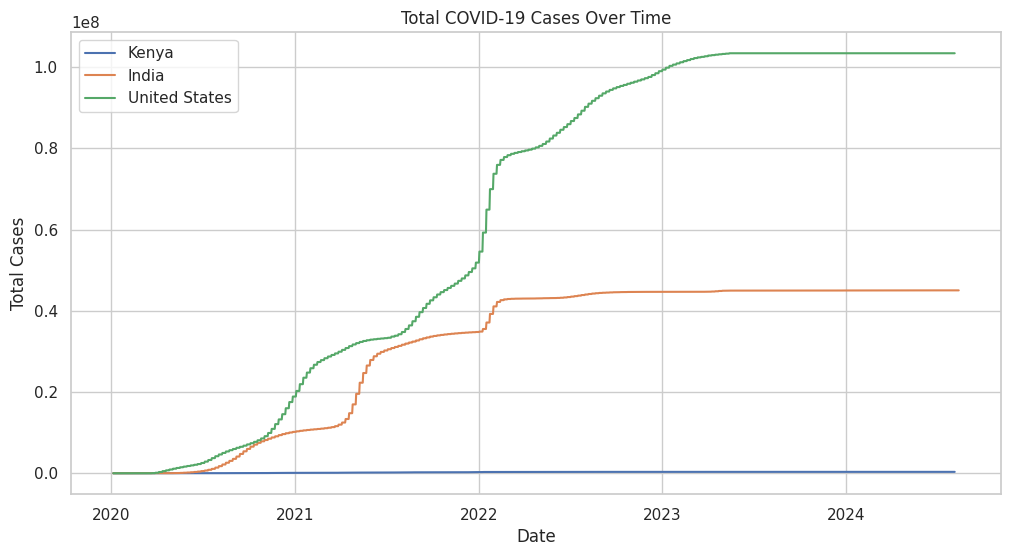

In [ ]:
# 🧪 3. Plot total cases over time
plt.figure()
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

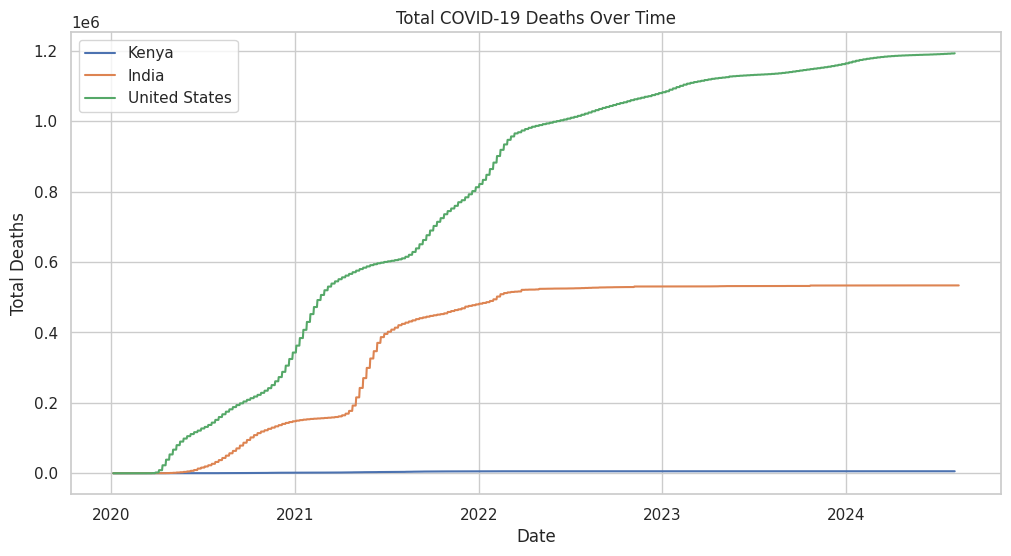

In [ ]:
# ☠️ 4. Plot total deaths over time
plt.figure()
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()


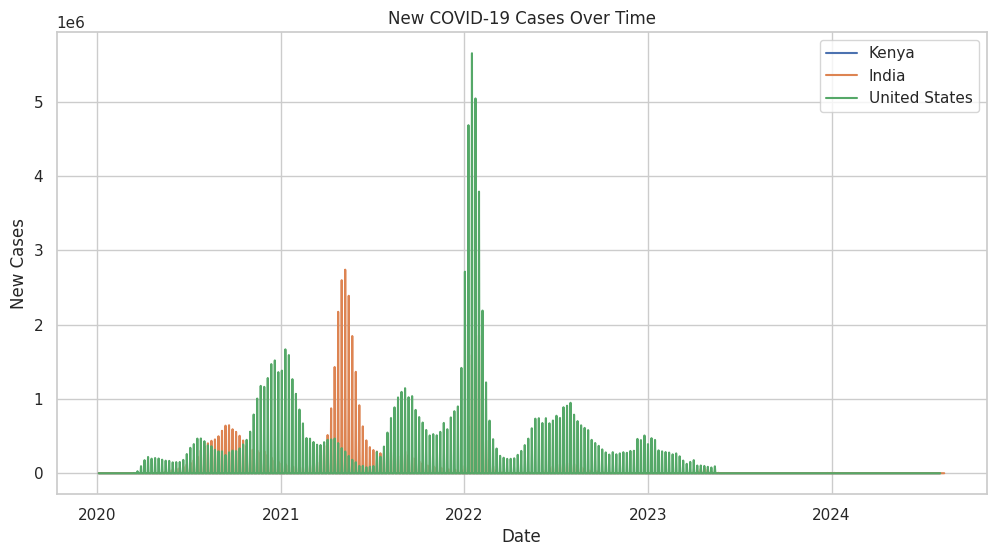

In [ ]:
# 📈 5. Daily new cases comparison
plt.figure()
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.title("New COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()


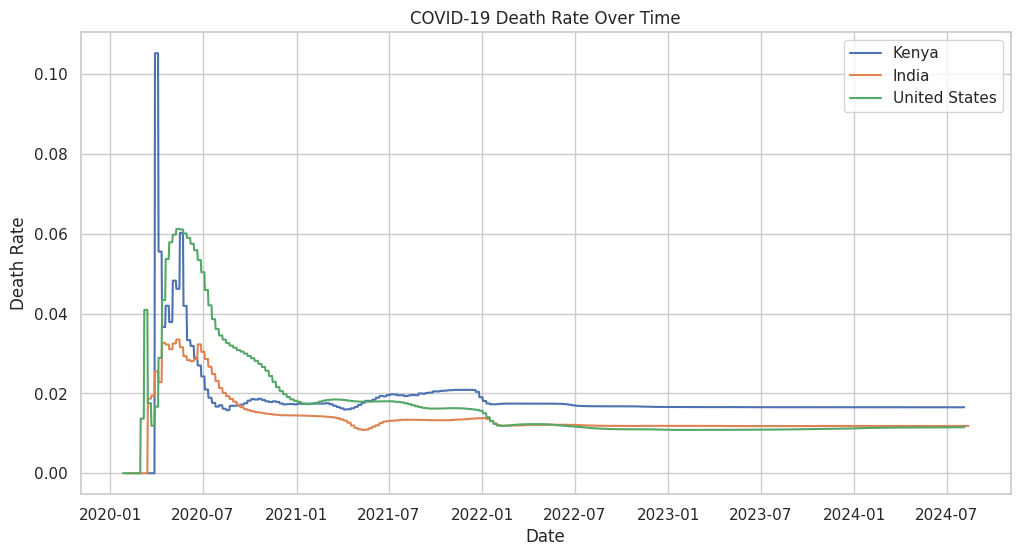

In [ ]:
# ☠️💉 6. Death rate = total_deaths / total_cases
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Plot death rate
plt.figure()
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.show()

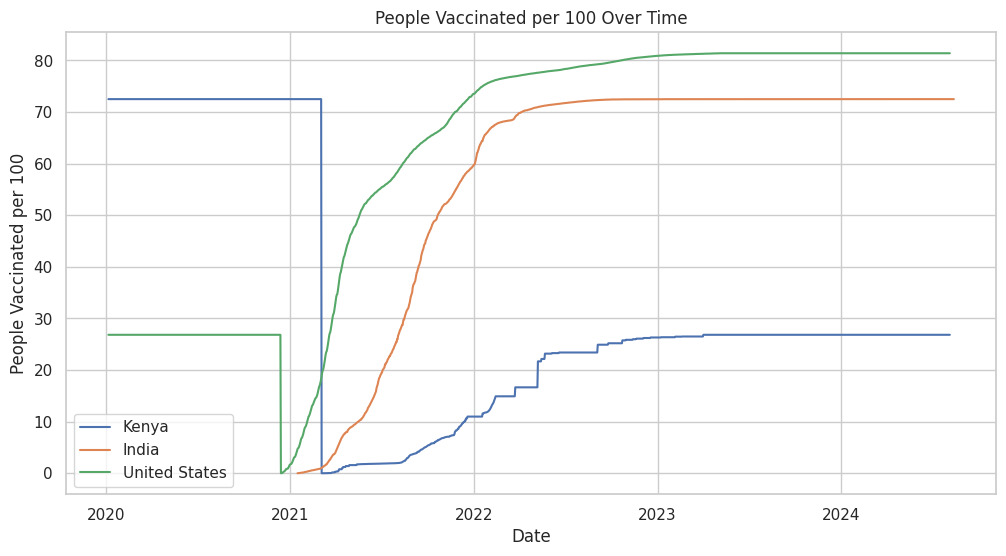

In [ ]:
# 💉 7. Vaccination progress
plt.figure()
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['people_vaccinated_per_hundred'], label=country)
plt.title("People Vaccinated per 100 Over Time")
plt.xlabel("Date")
plt.ylabel("People Vaccinated per 100")
plt.legend()
plt.show()